# Exploratory Data Analysis

1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터 개별 속성 파악하기

## 0. 라이브러리 준비

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [138]:
## 동일 경로에 "train.csv"가 있다면:
## 데이터 불러오기

titanic_df = pd.read_csv("./train.csv")

## 1. 분석의 목적과 변수 확인

- 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?

In [139]:
## 상위 5개 데이터 확인하기

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
## 각 Column의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [141]:
## 데이터 전체 정보를 얻는함수 : .describe()

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [142]:
## 상관계수 확인

titanic_df.corr()

# Correlation is NOT Causation

# 상관성 : A up, B up
# 인과성 : A -> B

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [143]:
## 결측치 확인

titanic_df.isnull().sum()
# Age, Cabin, Embarked에서 결측치 발견

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### 1. Suvived Column

In [144]:
## 생존자, 사망자 명수는?

titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

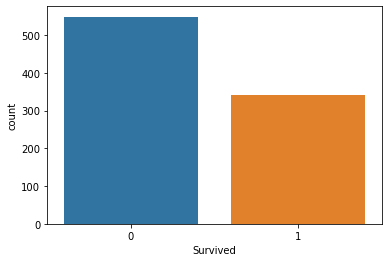

In [145]:
## 생존자수와 사망자수를 Barplot으로 그려보기 sns.countplot()

sns.countplot(x='Survived', data= titanic_df)
plt.show()

In [146]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [147]:
# 생존자 인원?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [148]:
# 생존 비율?


titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

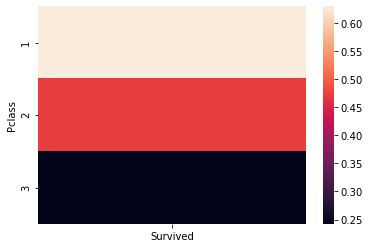

In [149]:
# 히트맵 활용

sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.plot()

## 3. Sex

In [150]:
titanic_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

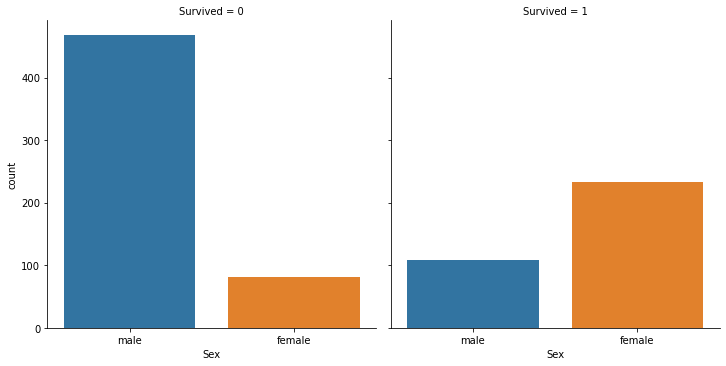

In [151]:
# sns.catplot

sns.catplot(x='Sex',col='Survived',kind = 'count',data = titanic_df)

## 4. Age
! 결측치 존재 !

In [152]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

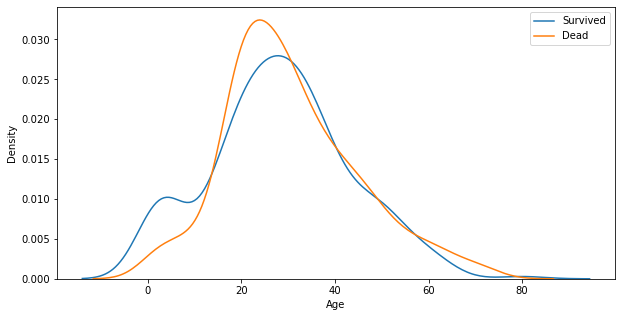

In [153]:
## Survived 1, 0 과 Age의 경향성

# subplots -> 여러 개의 plot을 한 번에 보여주는 함수

# figure -> axis -> plot
# figure : 그래프에 대한 도면
# axis : figure 안에 있는 각각의 틀. 이 위에 plot이 그려진다.

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'], ax=ax)

plt.legend(['Survived','Dead'])

plt.show()

## Appendix 1. Sex + Pclass vs Survived

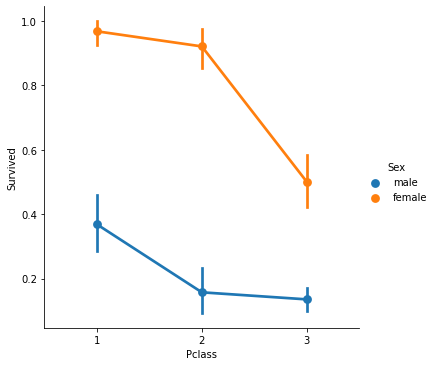

In [154]:
sns.catplot(x="Pclass", y="Survived", hue = "Sex", kind="point", data = titanic_df)
plt.show()

## Appendix 2. Age + Pclass

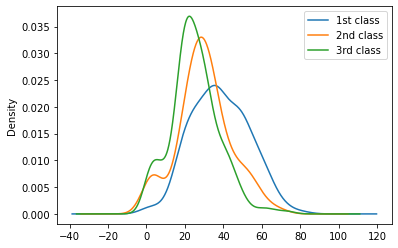

In [155]:
## Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st class','2nd class','3rd class'])
plt.show()

# Mission : It's Your Turn!

## 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

* Hint : Fare? Sibsp? Parch?

In [156]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

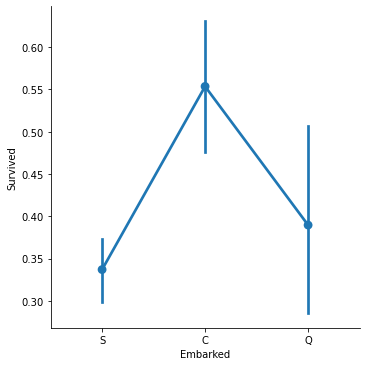

In [157]:
# 탑승 위치와 생존률은 상관관계가 있을 것이다. => C 선박장에서 탑승한 사람들은 생존율이 더 높은 것을 확인할 수 있었다.

sns.catplot(x='Embarked',y='Survived',kind = 'point',data = titanic_df)
plt.show()

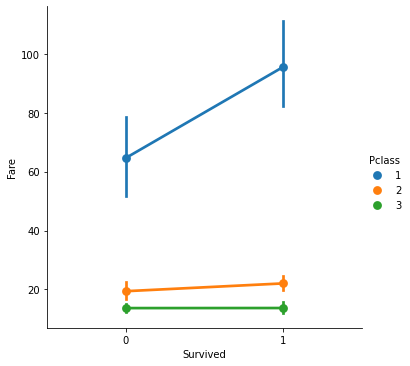

In [158]:
# Pclass가 높은 곳을 탑승한 사람이 더 많은 Fare를 지불했을 것이고, 그에 응당한 시설물들과 서비스가 갖춰져 있었을 것이므로 생존율이 높았을 것이다.
# => Pclass가 높은 곳을 탑승한 사람이 더 많은 Fare를 지불했다.
# => 1등석은 생존율이 사망율보다 압도적으로 높았고, 2등석은 생존율이 사망율보다 조금 더 높았으며, 3등석은 생존율과 사망율이 거의 비슷하다는 사실을 확인할 수 있었다.

sns.catplot(x="Survived", y="Fare", hue = "Pclass", kind="point", data = titanic_df)
plt.show()

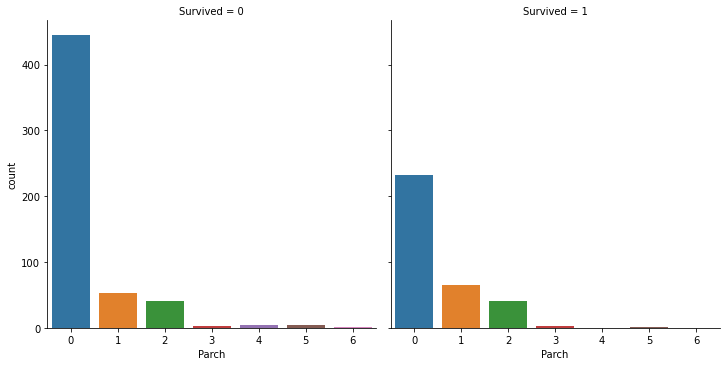

In [159]:
# 부모, 자식이 많으면 많을수록 챙겨야 하는 사람들이 많아져 미처 자신을 챙기지 못해 생존율이 낮을 것이다.
# => 챙겨야 할 사람들이 한 명도 없는 사람들의 수가 매우 많아 사망율이 굉장히 큰 것으로 나타나지만, 가장 높은 생존율 또한 기록하고 있다.

sns.catplot(x='Parch',col='Survived',kind = 'count',data = titanic_df)
plt.show()

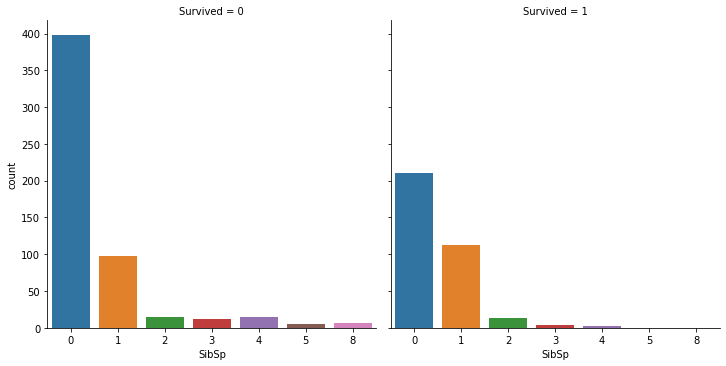

In [160]:
# 위와 일맥상통한 이유로 형제, 자매가 많으면 많을수록 생존율이 낮을 것이다.
# => 위와 비슷한 결과가 나타났다.

sns.catplot(x='SibSp',col='Survived',kind = 'count',data = titanic_df)
plt.show()

## 2. Kaggle에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해보자.

함께 보면 좋은 라이브러리

* numpy
* pandas
* seaborn
* matplotlib

**무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해봅시다.:**

1. 데이터를 톺아봅시다.
 * 각 데이터는 어떤 자료형을 가지고 있나요?
 * 데이터에 결측치는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?
 * 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding
2. 데이터에 대한 가설을 세워봅시다.
 * 가설은 개인의 경험에 의해 도출되어도 상관이 없습니다.
 * 가설은 명확할 수록 좋습니다. ex) Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다.
3. 가설을 검증하기 위한 증거를 찾아봅시다.
 * 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique을 써줘야 합니다.
 * `.groupby()`를 통해 그룹화된 정보에 통계량을 도입하면 어떨까요?
 * `.merge()`를 통해 두개 이상의 dataFrame을 합치면 어떨까요?

* 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?

# Heart Attack Analysis & Prediction Dataset
## A dataset for heart attack classification

URL : https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

About this dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no) 운동으로 인한 협심증

ca: number of major vessels (0-3) 심장 주요 혈관 수

cp : Chest Pain type chest pain type 가슴 통증 종류
- Value 1: typical angina 전형적인 협심증
- Value 2: atypical angina 비정형 협심증
- Value 3: non-anginal pain 비 협심증
- Value 4: asymptomatic 무증상

trtbps : resting blood pressure (in mm Hg) 혈압

chol : cholestoral in mg/dl fetched via BMI sensor BMI 센서를 통해 가져온 콜레스테롤 (mg / dl)

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 공복 혈당

rest_ecg : resting electrocardiographic results 휴식 심전도 결과

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) ST-T 파 이상 (T 파 반전 및 / 또는 ST 상승 또는 하강> 0.05mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  좌심실 비대 가능성을 보이거나 확실한 경우

thalach : maximum heart rate achieved 최대 심박수 달성

target : 0= less chance of heart attack 1= more chance of heart attack 0 = 심장마비 가능성 적음 1 = 심장마비 가능성 多

In [161]:
heart_df = pd.read_csv("./heart.csv")
heart_df.columns

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 1. 분석 목적과 변수 확인

## 분석 목적 : 심장마비 가능성이 높은 사람들의 특징이 무엇일까?

## 변수

* age : 나이
* sex : 성별
* cp : 가슴 통증 종류
* trtpbs : 혈압
* chol : BMI 센서를 통해 가져온 콜레스테롤
* fbs : 공복 혈당
* restecg : 휴식 심전도 결과
* thalachh : 최대 심박수 달성
* exng : 운동으로 인한 협심증
* oldpeak : 이전 피크
* output : 심장마비 가능성 적으면 0, 많으면 1

# 2. 데이터 전체적으로 살펴보기

In [162]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [163]:
heart_df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [164]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### 내가 세운 가설

* 나이가 많으면 심장마비 가능성이 높을 것이다
* 심장마비 가능성 여부는 성별과 상관관계가 있다.
* 가슴 통증의 종류와 심장마비 가능성 여부는 상관관계가 있다.
* 최대 심박수가 높으면 심장 마비 가능성이 높을 것이다.
* 나이가 많으면 많아질수록 콜레스테롤이 높아질 것이고 그에 따라 심장 마비 가능성이 높아질 것이다.
* 콜레스테롤이 높으면 심장 마비 가능성이 높을 것이다.

# 3. 데이터의 개별 속성 파악하기

In [165]:
# (1) 심장 마비 가능성이 높은 사람의 수 확인

heart_df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

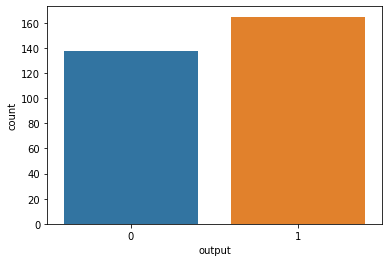

In [166]:
sns.countplot(x=heart_df['output'], data =heart_df)
plt.show()

In [167]:
# (2) 가슴 통증 유형에 따른 인원 파악

heart_df[['cp', 'output']].groupby(['cp']).count()

,output
cp,
0,143
1,50
2,87
3,23


In [168]:
# 각 가슴 통증마다 심장마비 가능성이 높은 인원은?

heart_df[['cp', 'output']].groupby(['cp']).sum()

,output
cp,
0,39
1,41
2,69
3,16


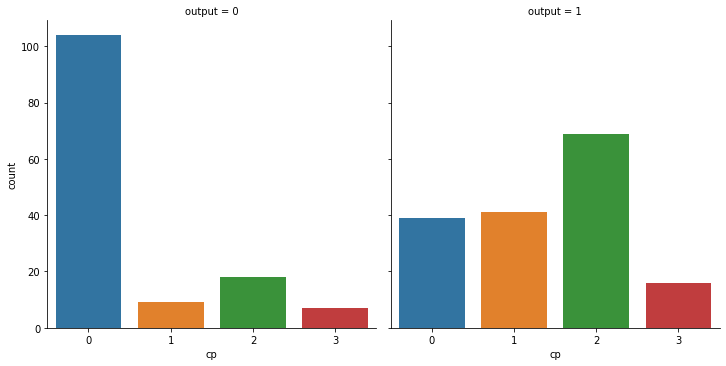

In [169]:
# => 비정형 협심증, 비 협심증, 무증상 환자는 심장마비가 올 가능성이 더 높다는 것을 알 수 있다. 특히 비정형 협심증과 비 협심증은 더욱 더 가능성이 높다.

sns.catplot(x='cp',col='output', kind = 'count', data = heart_df)
plt.show()

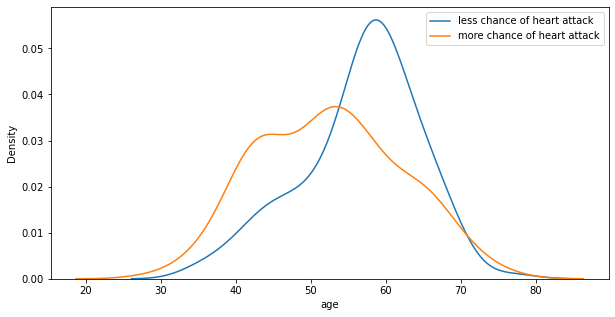

In [170]:
# (3) 나이에 따른 심장 마비 가능성 환자 확인
# => 오히려 40대-50대 비교적 젊은 환자들이 심장 마비 가능성이 더 높음을 확인할 수 있다.

fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(x=heart_df[heart_df.output==0]['age'], ax=ax)
sns.kdeplot(x=heart_df[heart_df.output==1]['age'], ax=ax)

plt.legend(['less chance of heart attack', 'more chance of heart attack'])

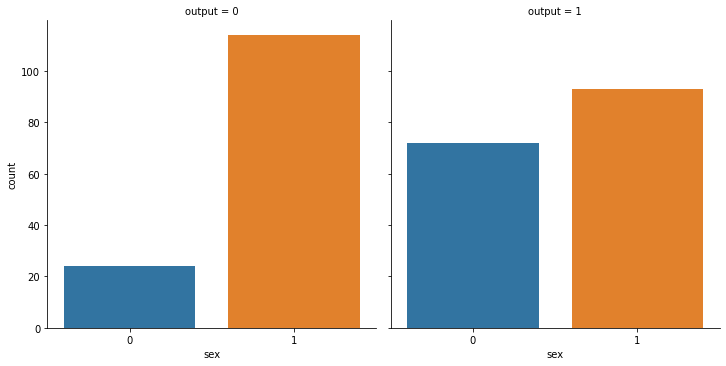

In [171]:
# (4) 성별에 따른 심장 마비 가능성 환자 확인
# => 남성이 여성에 비해 심장 마비 가능성이 더 높은 것을 확인할 수 있었다.

sns.catplot(x='sex',col='output',kind = 'count',data = heart_df)
plt.show()

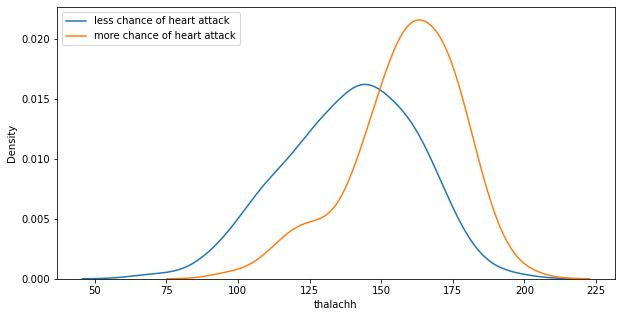

In [172]:
# (5) 최대 심박수에 따른 심장 마비 가능성 환자 확인
# => 최대 심박수가 150을 초과하는 순간부터 심장 마비 가능성이 더 높아지는 것을 확인할 수 있다.

fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(x=heart_df[heart_df.output==0]['thalachh'], ax=ax)
sns.kdeplot(x=heart_df[heart_df.output==1]['thalachh'], ax=ax)

plt.legend(['less chance of heart attack', 'more chance of heart attack'])
plt.show()

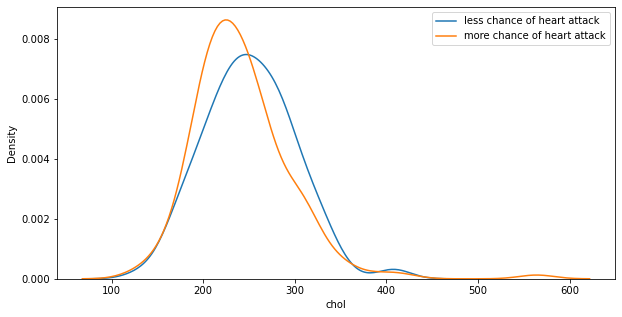

In [173]:
# (6) 콜레스테롤에 따른 심장 마비 가능성 환자 확인
# => 의외로 콜레스테롤은 심장 마비 가능성에 큰 영향을 끼치지 않는다는 것을 확인할 수 있었다.

fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(x=heart_df[heart_df.output==0]['chol'], ax=ax)
sns.kdeplot(x=heart_df[heart_df.output==1]['chol'], ax=ax)

plt.legend(['less chance of heart attack', 'more chance of heart attack'])
plt.show()

# 4. 데이터 복합 요소에 대해 살펴보기

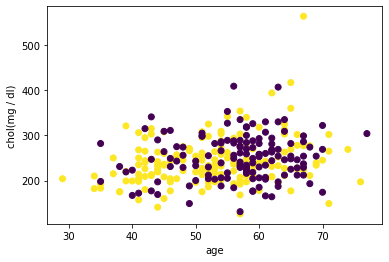

In [174]:
# (1) 나이 + 콜레스테롤에 따른 심장 마비 가능성 확인
# => 나이와 콜레스테롤에 연관이 없고, 심장 마비 가능성 또한 연관이 없음을 알 수 있었다....

plt.scatter('age', 'chol', c='output', data=heart_df)
plt.xlabel('age')
plt.ylabel('chol(mg / dl)')
plt.show()

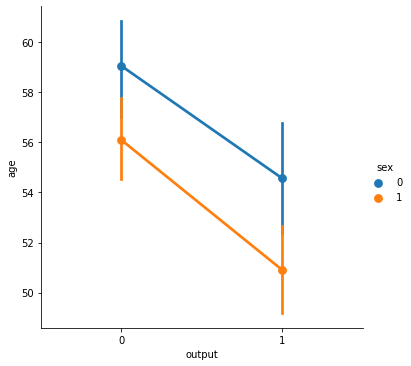

In [186]:
# (2) 나이 + 성별에 따른 심장 마비 가능성 확인
# => 남성과 여성 둘 다 고령보다 낮은 연령에서 더 심장 마비 가능성이 높은 환자가 많은 것으로 나타났다.

sns.catplot(x="output", y="age", hue = "sex", kind="point", data = heart_df)
plt.show()